In this task I use dataset provided by the laboratory of the Medical City Hospital. 
[Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1](https://data.mendeley.com/datasets/wj9rwkp9c2/1)

The data were collected from the Iraqi society of 1000 patients. The data consist of: Gender, AGE, Urea, Cr (creatinine ratio), HbA1c (glycohemoglobin), Chol (cholesterol), TG (triglycerides), HDL (high density lipoprotein), LDL (low density lipoprotein), VLDL (very low density lipoprotein),), BMI (body mass index), CLASS (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

1) Read the data

In [4]:
df = pd.read_csv('iraq-diabetes.csv')
df.head(3)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N


I transform data because it consist of cappitalization problems (line N an n).

In [5]:
df['CLASS'] = df['CLASS'].str.strip()
df['Gender'] = df['Gender'].str.upper()
df['Gender'] = df['Gender'].str.strip()

<AxesSubplot:xlabel='CLASS', ylabel='count'>

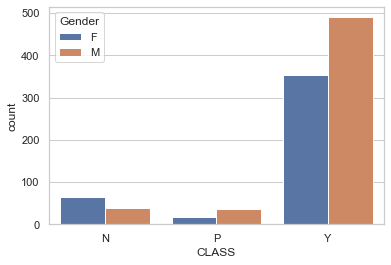

In [6]:
sns.countplot(x='CLASS', hue='Gender', data = df )

### Question 1
What is the average age of different groups of patients in this sample?

In [7]:
def q1():
    return df.iloc[:, [3,-1]].groupby('CLASS').mean().T

q1()

CLASS,N,P,Y
AGE,44.23301,43.283019,55.305687


### Question 2
Show 3 sex patient whose BMI highest in groups?

In [8]:
def q2(df, list):
    array = []
    for status in list:
        max = df.iloc[:, [-2,-1]].groupby('CLASS').max().T
        temp = df[df['CLASS'] == status]
        temp = temp[temp['BMI'] == float(max[status])] 
        temp['Gender'].head(2).values.tolist()
        array = array + temp['Gender'].head(2).values.tolist()
    print(array)
        
q2(df, ['N', 'P', 'Y'])


['M', 'F', 'M']


In this code I represent for 1 patients sex whose BMI is highest in their group (no diabet, prediabet, diabet). We can conclude that the highest value in no diabet group belongs to man, in prediabetic belong to female, and in diabetic belong to man.

### Question 3
Looking at the three highest Hba1c values counties, what are the age of the three most Hba1c highest patients (in order of highest to lowest)? 

In [9]:
def q3(df):
    answer = list(df.iloc[df['HbA1c'].nlargest(3).index]['AGE'])
    answer.sort(reverse=True)
    return print(answer)

q3(df)

[64, 61, 55]


We can conclude that the highest value of HBA1c corresponds with higher than average age.

### Question 4
Return 5 patients with minimal values of LDL, who are older than 50, and have diabet

In [10]:
def q4():
    temp = df.iloc[df['LDL'].nsmallest(5).index]
    temp = temp[temp['CLASS'] == 'Y']
    temp = temp[temp['AGE'] > 50]
    return temp
q4()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
565,624,356355,M,55,6.66,61,6.7,2.5,4.9,0.8,0.5,33.6,29.0,Y
724,645,34507,M,54,5.40,68,3.0,1.2,0.7,1.0,0.5,1.5,33.0,Y
882,44,8451,M,51,6.70,73,10.4,4.9,6.7,1.6,0.6,3.0,37.0,Y


### Question 5



Swow avarege age and HDL, LDL, VLDL for people who have no diabet.

In [97]:
def q5():
    temp = df.iloc[:,[3,-3,-4,-5,-1]]
    temp = temp[temp['CLASS'] == 'N'].mean()
    values = temp[1:].values
    age = temp[0]
    print('Age = ', age)
    print('HDL = ', values[0])
    print('LDL = ', values[1])
    print('VLDL = ', values[2])
    
q5()

Age =  44.23300970873787
HDL =  0.943689320388349
LDL =  2.625242718446603
VLDL =  1.227184466019417
